$$\require{mhchem}$$       

# Improving selectivity with a membrane reactor

We're interested in improving the selectivity of a PFR with two competing reactions:
\begin{align*}
\ce{A + B ->[r_1] D}\\
\ce{A + B ->[r_2] U}
\end{align*}
where $\ce{D}$ is a desirable product, and  $\ce{U}$ is the undesirable product.  We define the selectivity in the reactor as:
\begin{align*}
S_{D/(D+U)}=\frac{F_D}{F_D+F_U}
\end{align*}
The first reaction proceeds with rate $r_1=k_1 C_A^2C_B$ with $k_1=2$dm$^6$/mol$^2\cdot$ s, while the second reaction follows a different rate law $r_2=k_2 C_AC_B^2$ with $k_2=3$dm$^6$/mol$^2\cdot$ s. In either case, the reactor volume is 50L with an inner diameter of 20 cm. You can assume the reactor is isobaric and isothermal. 

#### Part A:  Solve for and plot the flow rates of A, B, D, and U (mol/s) against the distance traveled along the PFR (m). Assume that:
1. the PFR is standard (i.e., not membrane)
2. A and B are flowing into the inner vessel each at a flow rate of $4\; mol/s$
3. the combined, total concentration of A and B at the inlet is $0.8\; mol/dm^3$
4. All reactor flows are in solution, which means that changes in species concentrations do not affect volumetric flowrates significantly.
#### What's the final molar flowrate of D exiting the reactor? (4 pts)

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pycse import odelay

In [9]:
np.pi

3.141592653589793

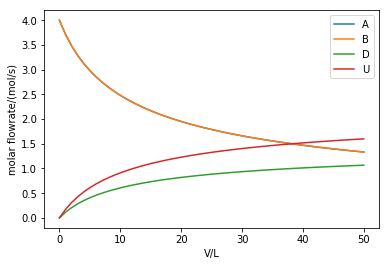

The final molar flowrate of D is 1.07 mol/s.


In [18]:
k1 = 2 # L2/mol2/s
k2 = 3 # L2/mol2/s

V = 50 # L
d = 20e-2 # m
L = V / 1000 / (np.pi / 4 * d ** 2) # m

species = ['A', 'B', 'D', 'U']
F0 = [4, 4, 0, 0] # mol/s
C0 = [0.4, 0.4, 0, 0]# mol/L
nu = np.sum(F0) / np.sum(C0) # L/s, constant

def dFdV(F, V):
    CA, CB, CC, CD = F / nu
    
    r1 = k1 * CA ** 2 * CB
    r2 = k2 * CA * CB ** 2
    
    yA = - r1 - r2
    yB = - r1 - r2
    yD = r1
    yU = r2
    
    return [yA, yB, yD, yU]

Vspan = np.linspace(0, V)

F_PFR = odeint(dFdV, F0, Vspan)

plt.plot(Vspan, F_PFR)
plt.legend(species)
plt.xlabel('V/L')
plt.ylabel('molar flowrate/(mol/s)')
plt.show()

print ('The final molar flowrate of D is {:1.2f} mol/s.'.format(F_PFR[-1, 2]))

#### Part B:  Calculate and plot the selectivity $S_{D/(D+U)}$ vs. reactor length (m). The scale of $S_{D/(D+U)}$ on the y-axis should be [0, 1] (2 pts)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


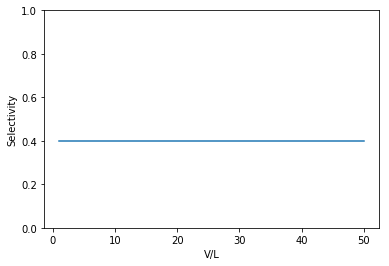

In [20]:
Ft = F_PFR[:, 2] + F_PFR[:, 3] # Ft = F_D + F_U
S = F_PFR[:, 2] / Ft # S = F_D / Ft

plt.plot(Vspan, S)
plt.xlabel('V/L')
plt.ylabel('Selectivity')

plt.ylim(0, 1)

plt.show()


#### Part C:  Solve for and plot the flow rate profiles of A, B, D, and U (mol/s) against the distance traveled along the PFR (m). This time, assume that:
1. The PFR is a membrane PFR, where A is fed into the inner vessel, B is fed into the outer vessel, and only species B may transport across the membrane.
2. A is flowing in to the inner vessel at a molar flow rate of $4\; mol/s$ and a concentration of $0.4\; mol/dm^3$.
3. B is flowing in to the outer vessel at a molar flow rate of $4\; mol/s$ and a concentration of $0.4\; mol/dm^3$.
4. mass transport across the membrane (from the outer to the inner vessel) can be modeled with $R_B=ak_{cB}(C_{Bin}-C_{Bout})$ with $k_{cB}=0.1\;$dm/s$.
#### (6 pts)

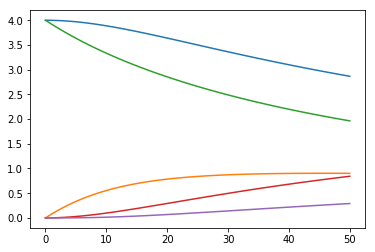

In [26]:
F0_out = F0_in = 4 # mol/s
CA0 = CB0 = 0.4 # mol/L
nu_in = nu_out = 4 / 0.4

kcB = 0.1 # dm/s

def dFdV_m(F, V):
    FA, FB_in, FB_out, FD, FU = F
    
    CA = FA / nu_in
    CB_in = FB_in / nu_in
    CB_out = FB_out / nu_out
    
    r1 = k1 * CA ** 2 * CB_in
    r2 = k2 * CA * CB_in ** 2
    
    a = 4 / (d * 10)
    RB = a * kcB * (CB_in - CB_out)
    
    yA = - r1 - r2
    yB_in = - r1 - r2 - RB
    yB_out = + RB
    yD = r1
    yU = r2
    return [yA, yB_in, yB_out, yD, yU]

F0_m = [F0_in, 0, F0_out, 0, 0]

F_m = odeint(dFdV_m, F0_m, Vspan)
plt.plot(Vspan, F_m)
plt.show()

#### Part D:  To make a fair comparison comparison between the standard PFR and the membrane PFR, we want to analyze a membrane PFR system that has an outlet molar flowrate of D equal to the one you calculated in Part A (for the standard PFR). For the membrane PFR, what is a molar feedrate of B in the outer vessel (mol/s) that will yield this outlet flowrate of D? (4 pts)

In [48]:
def event(F, V):
    value = F[3] - 1.07 #F_PFR[-1, 2] # the final molar flowrate of D
    # print(F[3])
    isterminal = True
    direction = 0
    return value, isterminal, direction

Vspan = np.linspace(0, 100)

V, F, Ve, Fe, ie = odelay(dFdV_m, F0_m, Vspan, [event])

#F_m = odeint(dFdV_m, F0_m, Vspan)

In [45]:
F_m[:, 3]

array([ 0.        ,  0.00506848,  0.01922226,  0.04091563,  0.06869558,
        0.10124657,  0.1374145 ,  0.17621311,  0.21681812,  0.25855353,
        0.30087415,  0.34334696,  0.38563307,  0.42747132,  0.46866393,
        0.50906415,  0.54856611,  0.5870963 ,  0.62460674,  0.66106943,
        0.69647186,  0.73081348,  0.76410287,  0.79635548,  0.82759187,
        0.85783628,  0.88711558,  0.91545837,  0.94289431,  0.96945362,
        0.99516666,  1.02006362,  1.04417428,  1.06752785,  1.09015285,
        1.11207698,  1.13332709,  1.15392913,  1.17390814,  1.19328821,
        1.21209252,  1.23034331,  1.24806194,  1.2652689 ,  1.28198379,
        1.29822541,  1.31401175,  1.32936003,  1.34428675,  1.35880766])

In [49]:
Ve

array([ 67.56684028])

#### Part E:  Now we want to compare the selectivities of the two reactor types. Start by recalculating the flow profiles in the membrane PFR—i.e., Part C—but use the newly identified inlet flowrate of B. Then use this profile to calculate the selectivity (mol/mol) as a function of reactor length (m). Now plot this new selectivity profile alongside the selectivity profile you created in Part B. Which reactor configuration would you recommend, standard PFR or membrane? Why? (2 pts)

# Bonus

#### For regulatory reasons we need a minimum selectivity of 75%, and for economic reasons we want a conversion of at least 25%. We are allowed to change the feedrate of B and the length of the membrane PFR. To the nearest decimeter, what's the smallest reactor length we can use to achieve both criteria? (4 pts)

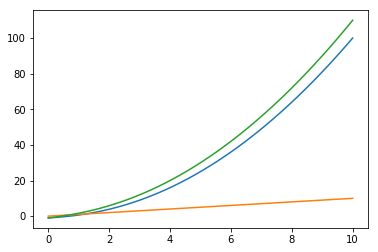

In [8]:
import numpy as np
import matplotlib.pyplot as plt
xspan = np.linspace(0, 10)

def f(x):
    return x ** 2 - np.exp(-x)

y=f(xspan)
plt.plot(xspan,y,xspan,xspan,xspan,xspan+y)
plt.show()